# K-NEAREST NEIGHBOURS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [3]:
df = pd.read_csv('Zoo.csv')

In [5]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [17]:
df_plot = df.copy()


In [19]:
df_plot['type'] = df_plot['type'].astype(str)

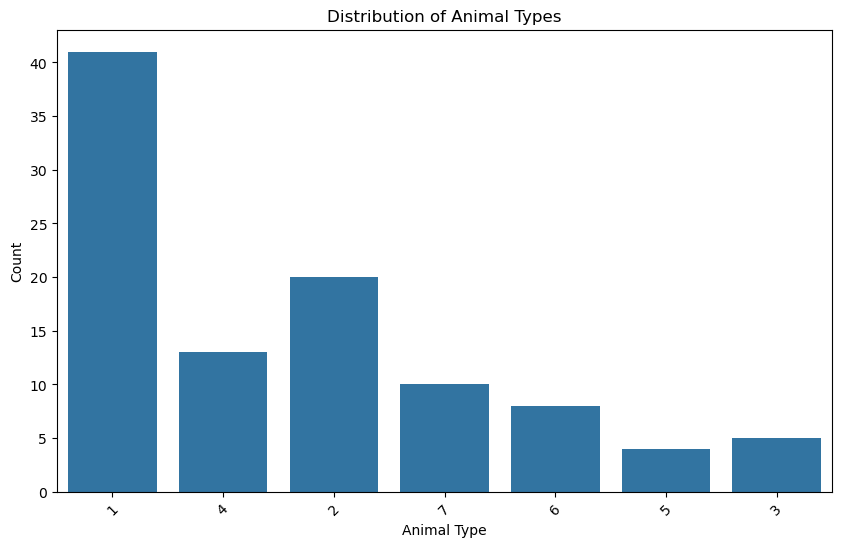

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot, x='type')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() 

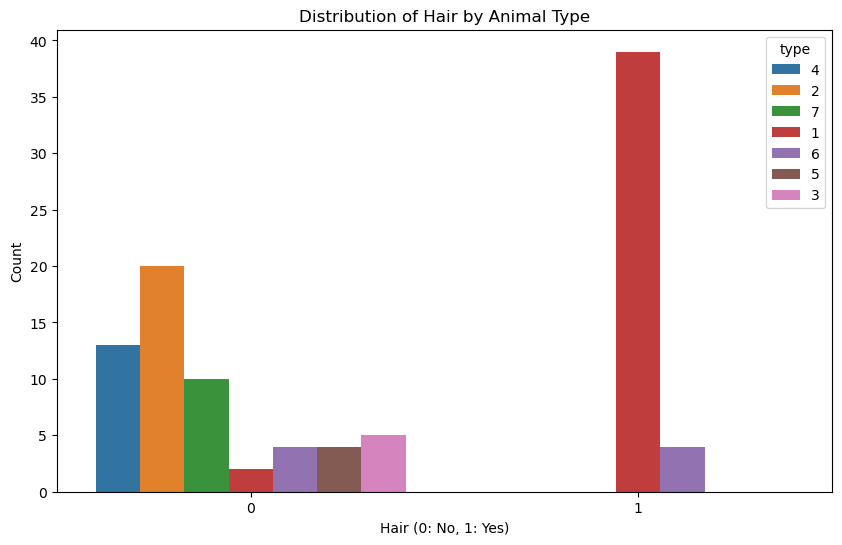

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot, x='hair', hue='type')
plt.title('Distribution of Hair by Animal Type')
plt.xlabel('Hair (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [25]:
if 'animal name' in df.columns:
    df_processed = df.drop('animal name', axis=1)
else:
    df_processed = df.copy()

In [27]:
df_processed['type'] = df_processed['type'].astype(int)
X = df_processed.drop('type', axis=1) # Corrected: use 'type' as the column to drop for features
y = df_processed['type']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (80, 16), (80,)
Testing set shape: (21, 16), (21,)


In [71]:
k_range = range(1, 20)
scores = []

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

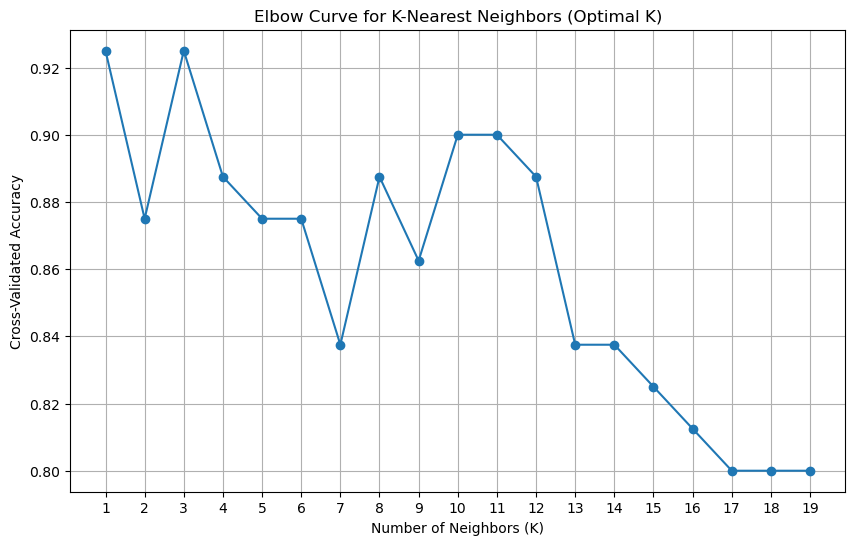

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o') # Now k_range (length 19) and scores (length 19) will match
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Elbow Curve for K-Nearest Neighbors (Optimal K)')
plt.xticks(k_range)
plt.grid(True)
plt.show() 

In [79]:
optimal_k = k_range[np.argmax(scores)]


In [81]:
print(f"\nOptimal K found using cross-validation: {optimal_k}")


Optimal K found using cross-validation: 1


In [83]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')


In [85]:
knn_optimal.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [55]:
y_pred = knn_optimal.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 


1.0

In [59]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
precision 


1.0

In [61]:
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
recall


1.0

In [63]:
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
f1 

1.0

In [65]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



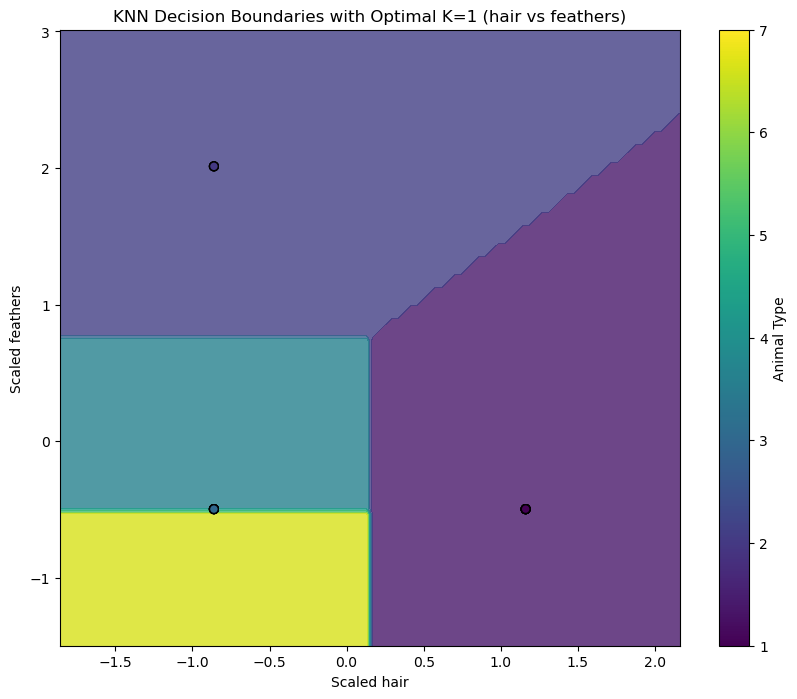

In [69]:
if X_scaled.shape[1] >= 2:
    feature_names = X.columns.tolist()
    feature1_idx = 0
    feature2_idx = 1
    feature1_name = feature_names[feature1_idx]
    feature2_name = feature_names[feature2_idx]
    knn_viz = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
    knn_viz.fit(X_train[:, [feature1_idx, feature2_idx]], y_train)
    x_min, x_max = X_scaled[:, feature1_idx].min() - 1, X_scaled[:, feature1_idx].max() + 1
    y_min, y_max = X_scaled[:, feature2_idx].min() - 1, X_scaled[:, feature2_idx].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis') 
    plt.scatter(X_test[:, feature1_idx], X_test[:, feature2_idx], c=y_test, cmap='viridis', edgecolor='k', s=40)
    plt.xlabel(f'Scaled {feature1_name}')
    plt.ylabel(f'Scaled {feature2_name}')
    plt.title(f'KNN Decision Boundaries with Optimal K={optimal_k} ({feature1_name} vs {feature2_name})')
    plt.colorbar(label='Animal Type')
    plt.show()
else:
    print("\nNot enough features to visualize 2D decision boundaries.")

# Interview Questions 
